In [1]:
import torch
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from torchvision import transforms, datasets

from core.Util import show_plt
from core.BaseGAN import Discriminator, Generator

In [2]:
device = 'cpu'
if torch.mps.is_available():
    device = 'mps'
elif torch.cuda.is_available():
    device = 'cuda'

In [3]:
train_dataset = datasets.MNIST(root = "../data/",
                               train = True,
                               transform = transforms.ToTensor())

In [4]:
generator = Generator().to(device)
discriminator = Discriminator().to(device)

criterion = torch.nn.BCELoss()
disc_optimizer = torch.optim.Adam(discriminator.parameters(), lr=0.0001)
genr_optimizer = torch.optim.Adam(generator.parameters(), lr=0.0001)

In [5]:
def train_step(model, x, target, criterion, optimizer):
    model.train()
    pred = model(x)
    loss = criterion(pred, target)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    return loss.item()

### 주의사항
 - 모델에 시드 값이 정규분포를 따를때 생성기의 학습이 잘됨 -> 그냥 랜덤값이면 학습 안됨
 - 모델 만들때, Normalizer, Activation 함수가 어떤것이냐에 따라 차이를 많이 보임
   - 현재 코드에서는 LayerNormalizer, LeakliyRelu 가 가장 빠르게 모드 붕괴를 해소함

  0%|                                               | 0/1 [00:00<?, ?it/s, 1/60000, dis_loss: 0.7058, gen_loss: 0.4314]

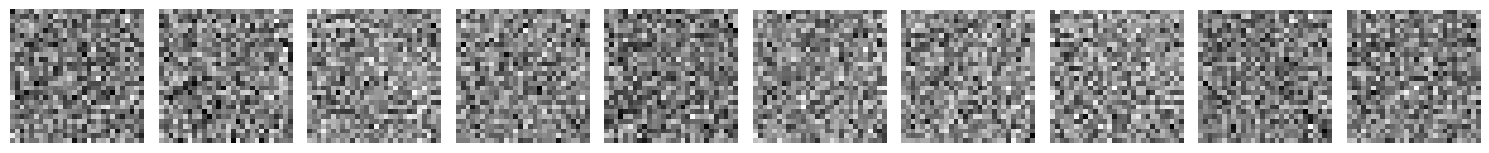

  0%|                                            | 0/1 [00:04<?, ?it/s, 1001/60000, dis_loss: 0.0200, gen_loss: 5.0920]

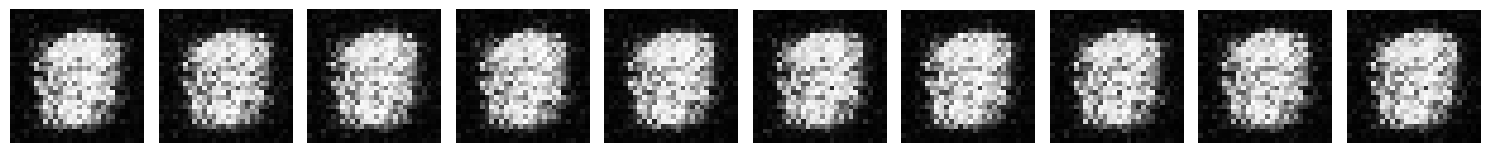

  0%|                                            | 0/1 [00:08<?, ?it/s, 2001/60000, dis_loss: 0.0292, gen_loss: 4.7531]

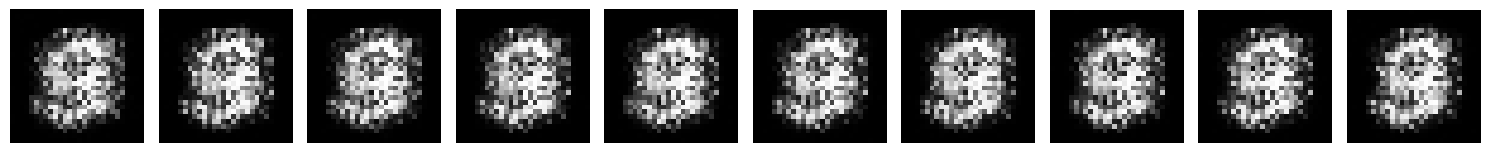

  0%|                                            | 0/1 [00:13<?, ?it/s, 3001/60000, dis_loss: 0.0270, gen_loss: 4.7533]

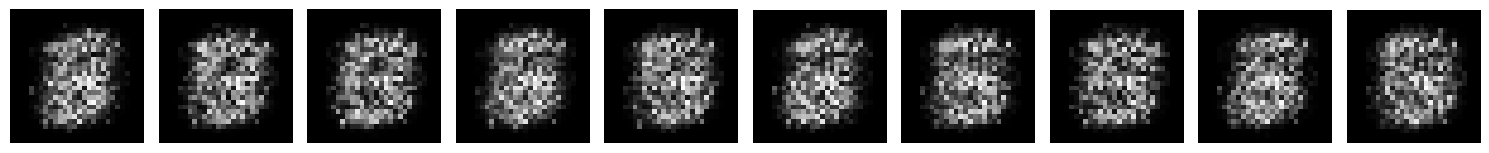

  0%|                                            | 0/1 [00:18<?, ?it/s, 4001/60000, dis_loss: 0.0366, gen_loss: 4.5192]

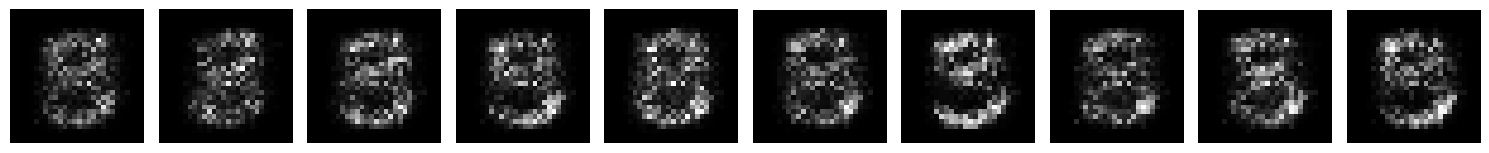

  0%|                                            | 0/1 [00:23<?, ?it/s, 5001/60000, dis_loss: 0.0523, gen_loss: 4.2865]

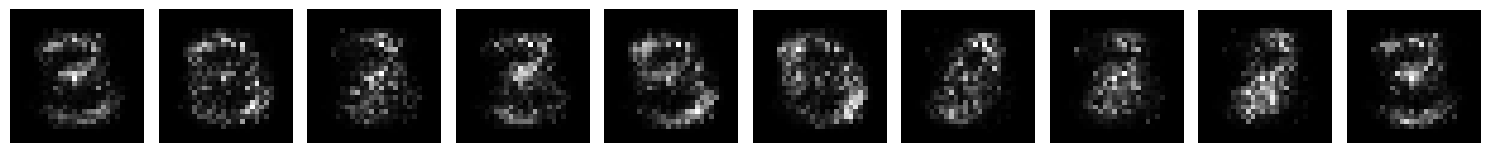

  0%|                                            | 0/1 [00:28<?, ?it/s, 6001/60000, dis_loss: 0.0579, gen_loss: 4.1603]

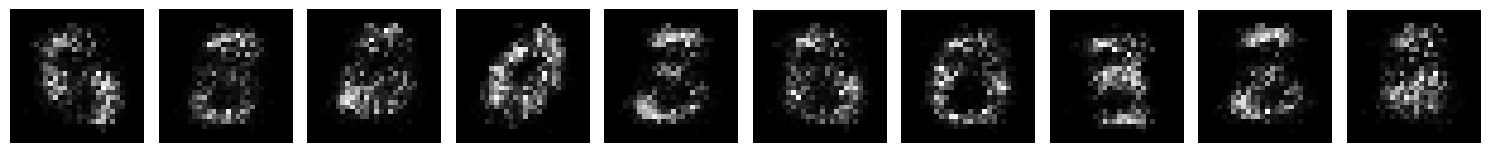

  0%|                                            | 0/1 [00:33<?, ?it/s, 7001/60000, dis_loss: 0.0594, gen_loss: 4.1264]

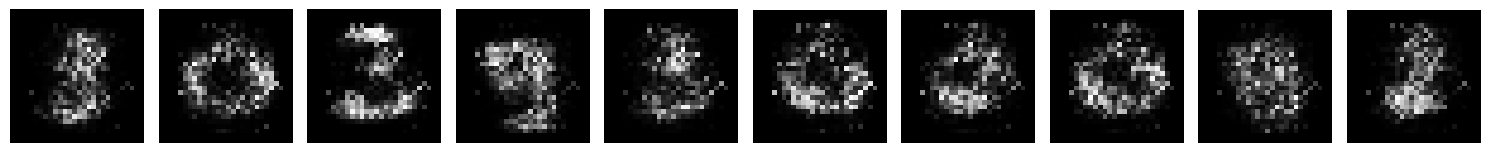

  0%|                                            | 0/1 [00:39<?, ?it/s, 8001/60000, dis_loss: 0.0612, gen_loss: 4.0974]

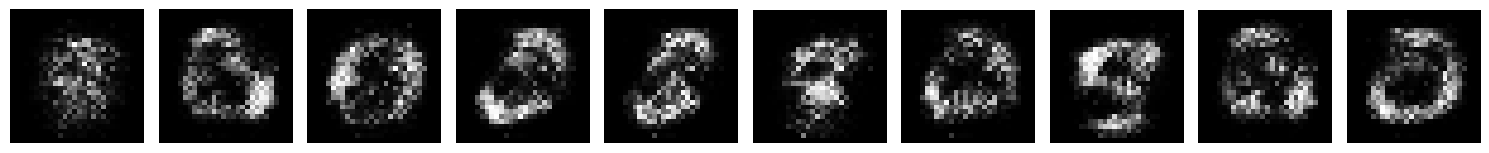

  0%|                                            | 0/1 [00:44<?, ?it/s, 9001/60000, dis_loss: 0.0650, gen_loss: 4.0408]

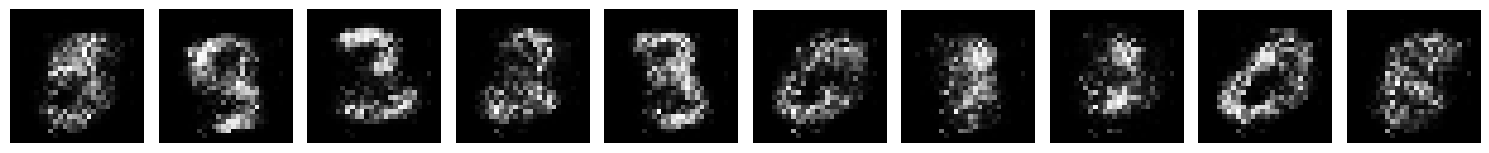

  0%|                                           | 0/1 [00:49<?, ?it/s, 10001/60000, dis_loss: 0.0666, gen_loss: 4.0209]

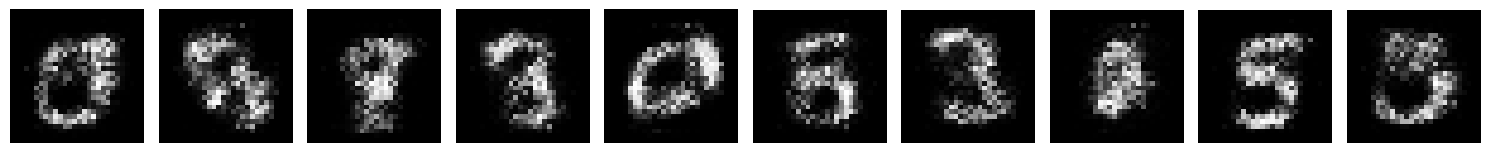

  0%|                                           | 0/1 [00:55<?, ?it/s, 11001/60000, dis_loss: 0.0704, gen_loss: 3.9858]

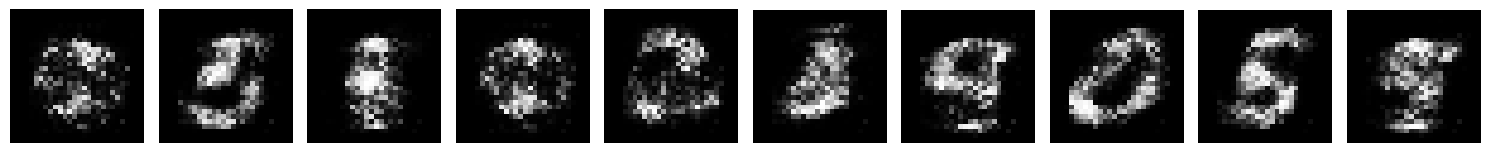

  0%|                                           | 0/1 [01:00<?, ?it/s, 12001/60000, dis_loss: 0.0728, gen_loss: 3.9694]

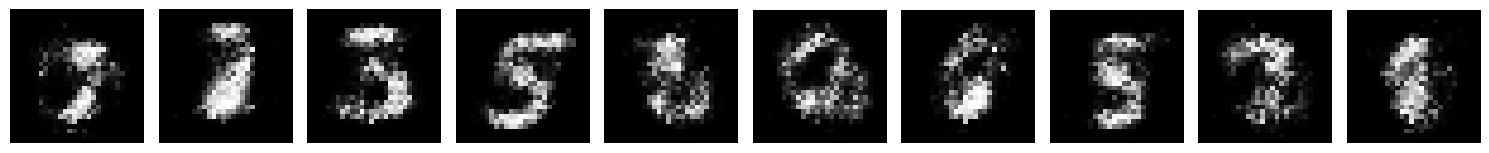

  0%|                                           | 0/1 [01:06<?, ?it/s, 13001/60000, dis_loss: 0.0763, gen_loss: 3.9339]

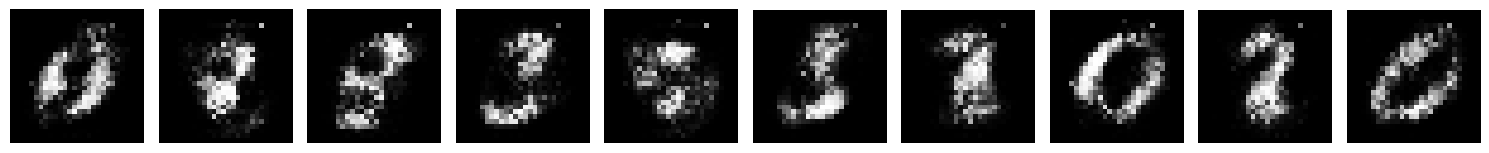

  0%|                                           | 0/1 [01:12<?, ?it/s, 14001/60000, dis_loss: 0.0774, gen_loss: 3.9211]

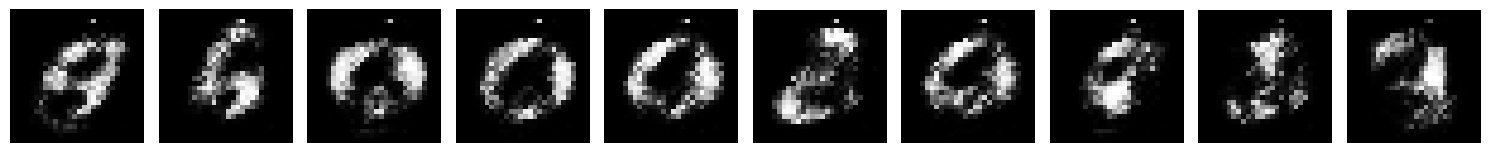

  0%|                                           | 0/1 [01:17<?, ?it/s, 15001/60000, dis_loss: 0.0797, gen_loss: 3.9104]

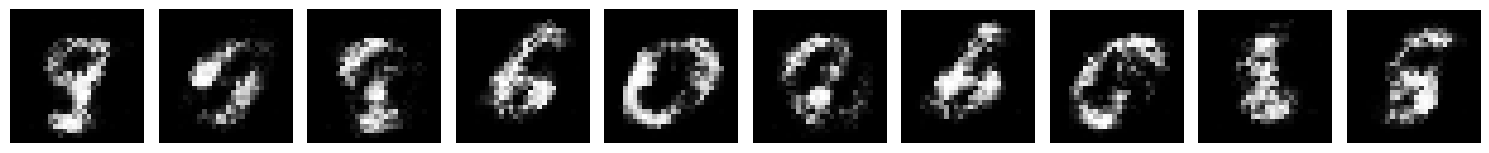

  0%|                                           | 0/1 [01:23<?, ?it/s, 16001/60000, dis_loss: 0.0814, gen_loss: 3.8967]

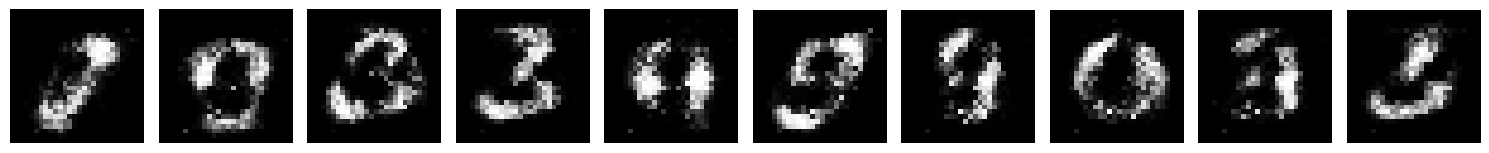

  0%|                                           | 0/1 [01:29<?, ?it/s, 17001/60000, dis_loss: 0.0835, gen_loss: 3.8839]

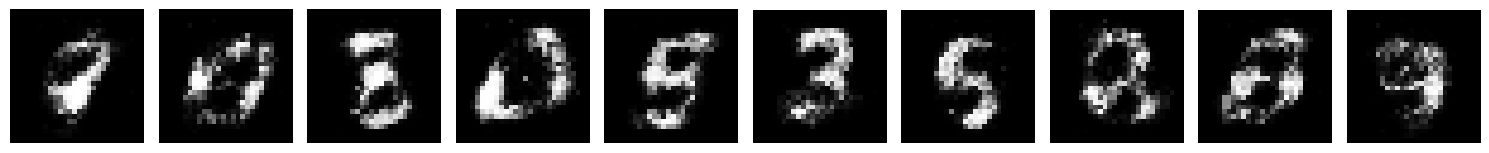

  0%|                                           | 0/1 [01:35<?, ?it/s, 18001/60000, dis_loss: 0.0859, gen_loss: 3.8582]

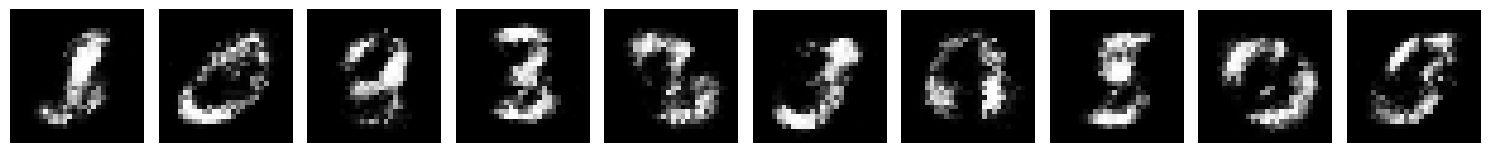

  0%|                                           | 0/1 [01:41<?, ?it/s, 19001/60000, dis_loss: 0.0885, gen_loss: 3.8389]

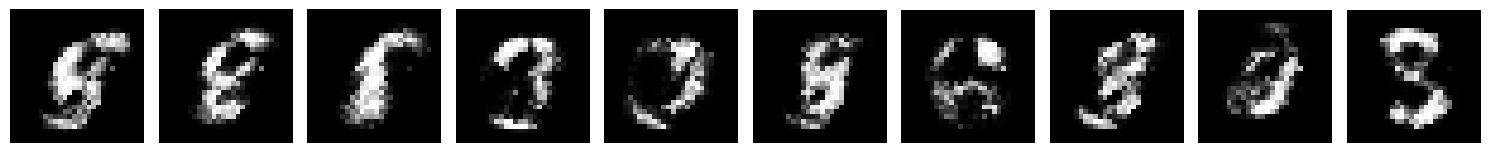

  0%|                                           | 0/1 [01:47<?, ?it/s, 20001/60000, dis_loss: 0.0917, gen_loss: 3.8188]

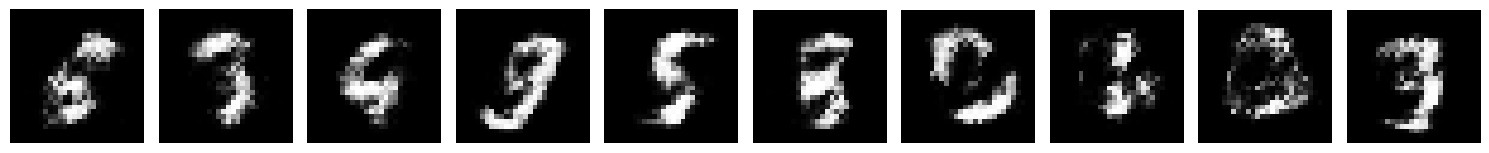

  0%|                                           | 0/1 [01:54<?, ?it/s, 21001/60000, dis_loss: 0.0940, gen_loss: 3.8058]

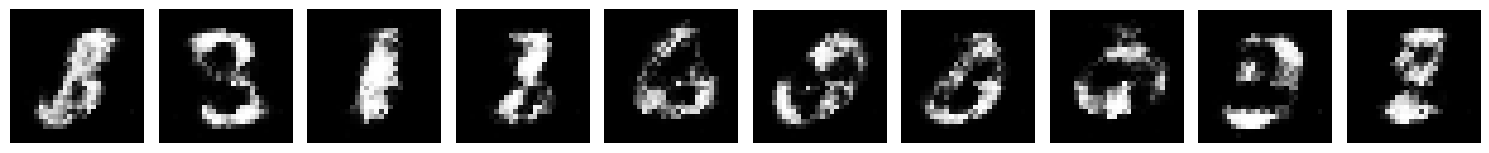

  0%|                                           | 0/1 [02:00<?, ?it/s, 22001/60000, dis_loss: 0.0965, gen_loss: 3.7814]

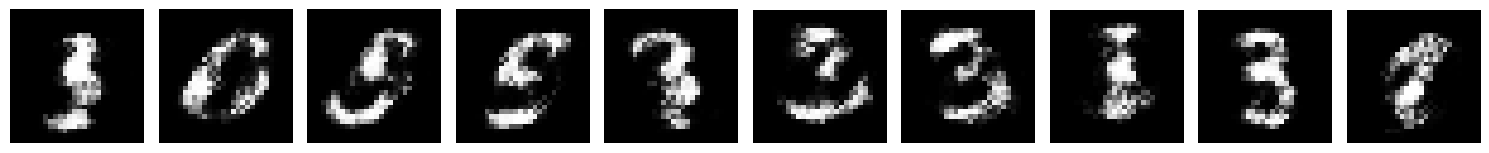

  0%|                                           | 0/1 [02:06<?, ?it/s, 23001/60000, dis_loss: 0.0999, gen_loss: 3.7610]

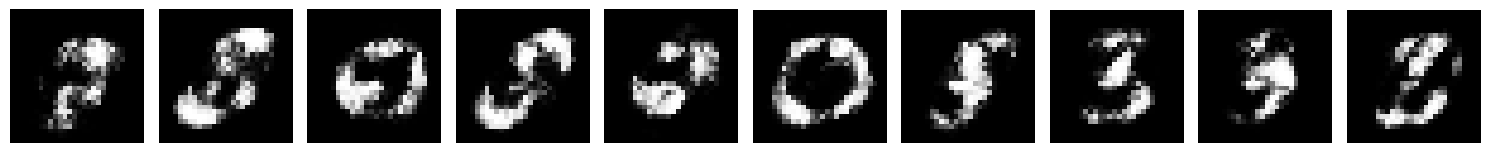

  0%|                                           | 0/1 [02:13<?, ?it/s, 24001/60000, dis_loss: 0.1027, gen_loss: 3.7493]

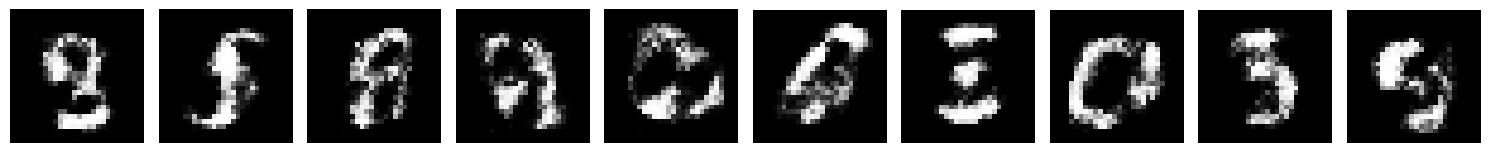

  0%|                                           | 0/1 [02:19<?, ?it/s, 25001/60000, dis_loss: 0.1050, gen_loss: 3.7317]

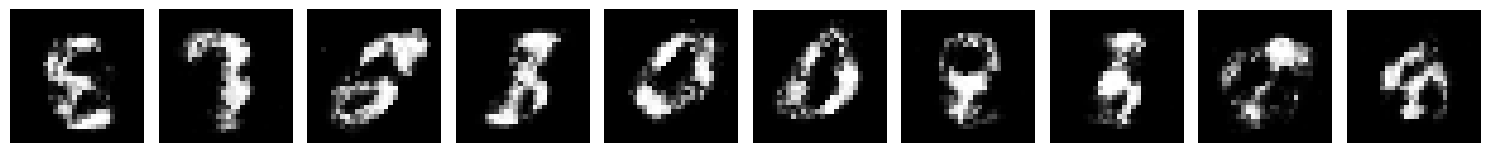

  0%|                                           | 0/1 [02:26<?, ?it/s, 26001/60000, dis_loss: 0.1086, gen_loss: 3.7125]

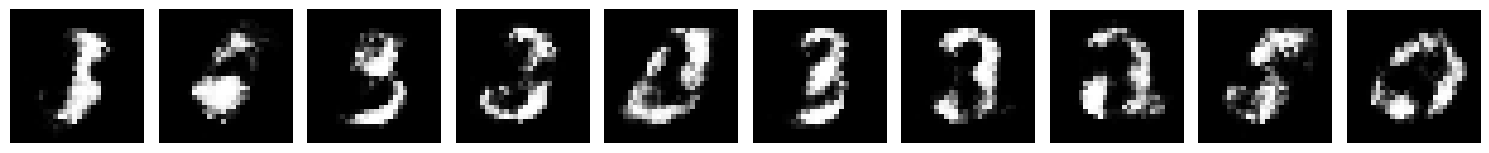

  0%|                                           | 0/1 [02:32<?, ?it/s, 27001/60000, dis_loss: 0.1123, gen_loss: 3.6888]

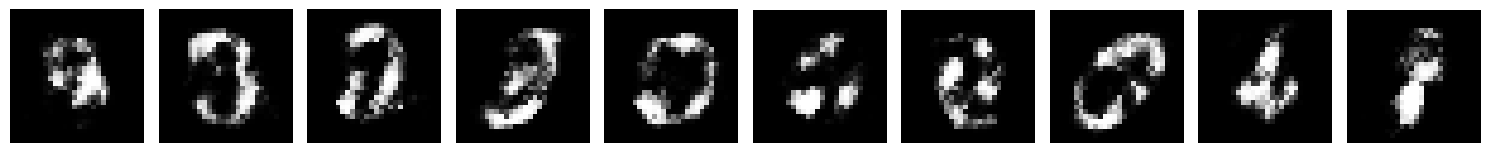

  0%|                                           | 0/1 [02:39<?, ?it/s, 28001/60000, dis_loss: 0.1158, gen_loss: 3.6681]

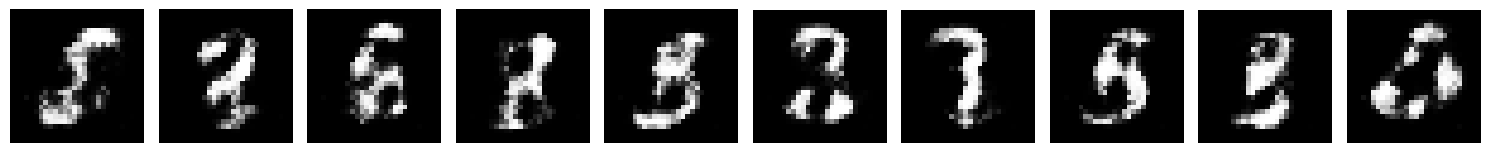

  0%|                                           | 0/1 [02:46<?, ?it/s, 29001/60000, dis_loss: 0.1198, gen_loss: 3.6386]

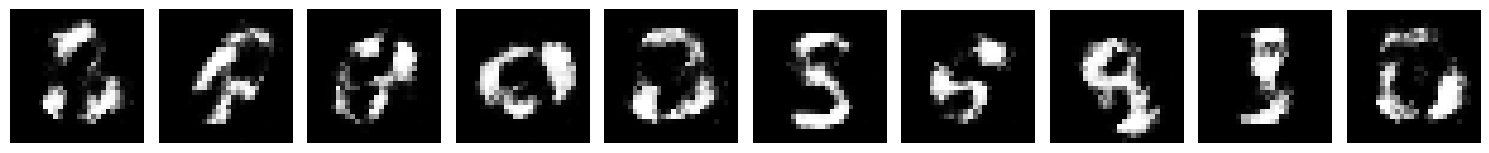

  0%|                                           | 0/1 [02:53<?, ?it/s, 30001/60000, dis_loss: 0.1219, gen_loss: 3.6202]

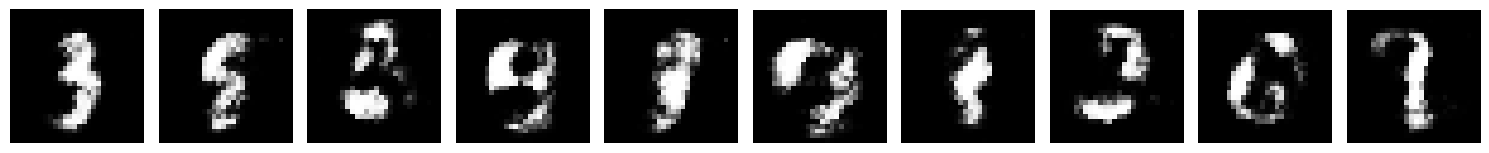

  0%|                                           | 0/1 [03:00<?, ?it/s, 31001/60000, dis_loss: 0.1239, gen_loss: 3.6039]

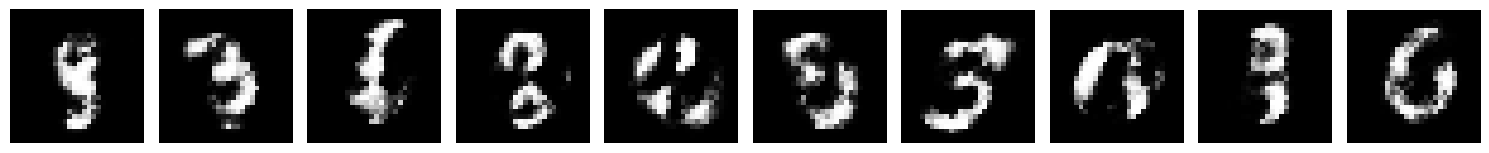

  0%|                                           | 0/1 [03:07<?, ?it/s, 32001/60000, dis_loss: 0.1262, gen_loss: 3.5897]

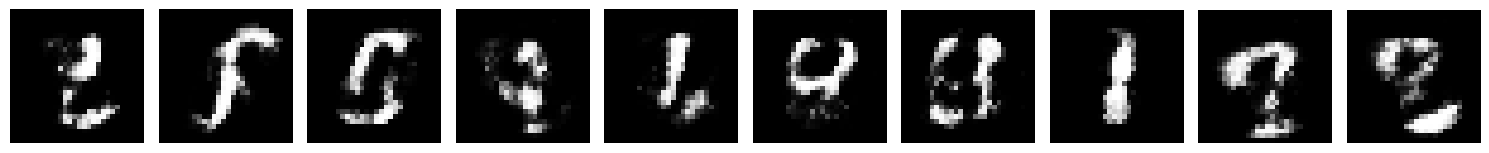

  0%|                                           | 0/1 [03:14<?, ?it/s, 33001/60000, dis_loss: 0.1290, gen_loss: 3.5730]

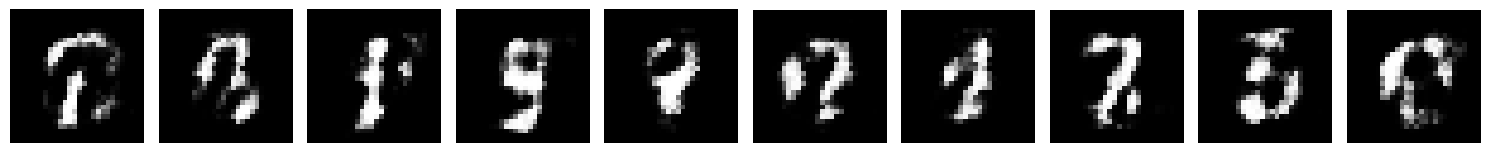

  0%|                                           | 0/1 [03:22<?, ?it/s, 34001/60000, dis_loss: 0.1321, gen_loss: 3.5541]

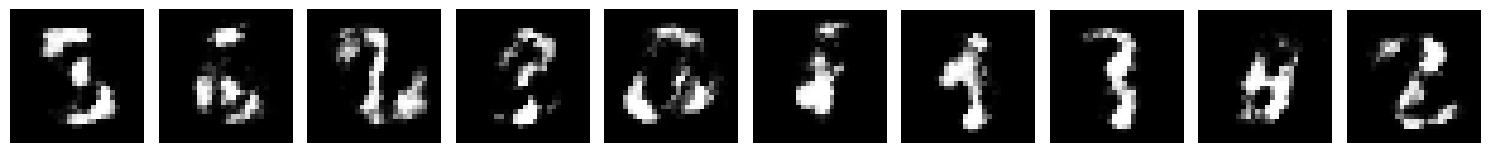

  0%|                                           | 0/1 [03:29<?, ?it/s, 35001/60000, dis_loss: 0.1347, gen_loss: 3.5360]

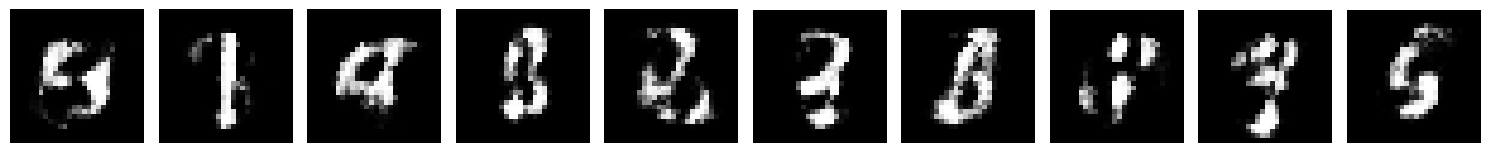

  0%|                                           | 0/1 [03:36<?, ?it/s, 36001/60000, dis_loss: 0.1372, gen_loss: 3.5230]

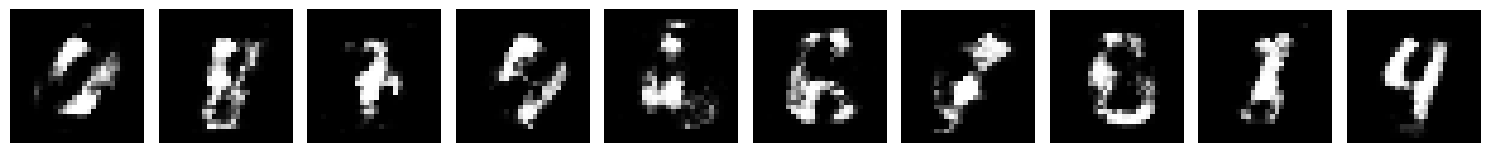

  0%|                                           | 0/1 [03:44<?, ?it/s, 37001/60000, dis_loss: 0.1398, gen_loss: 3.5009]

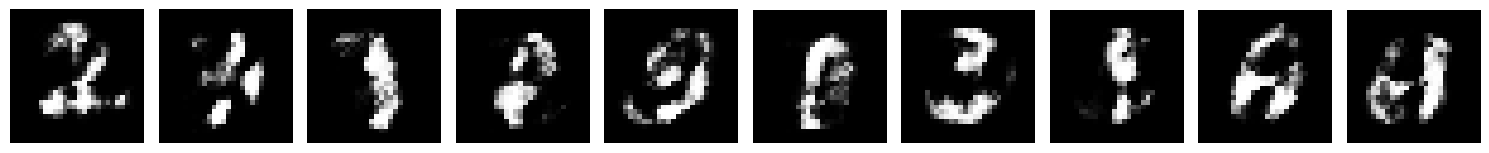

  0%|                                           | 0/1 [03:51<?, ?it/s, 38001/60000, dis_loss: 0.1429, gen_loss: 3.4788]

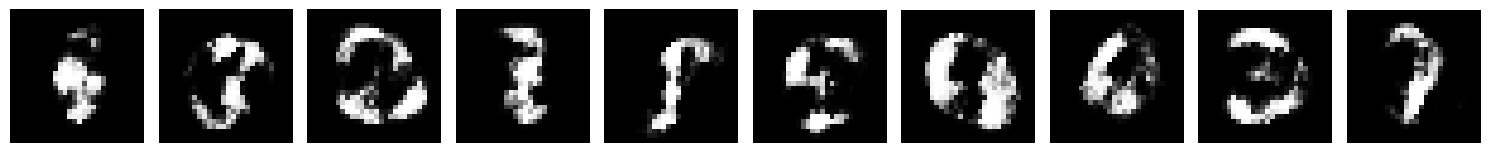

  0%|                                           | 0/1 [03:59<?, ?it/s, 39001/60000, dis_loss: 0.1456, gen_loss: 3.4641]

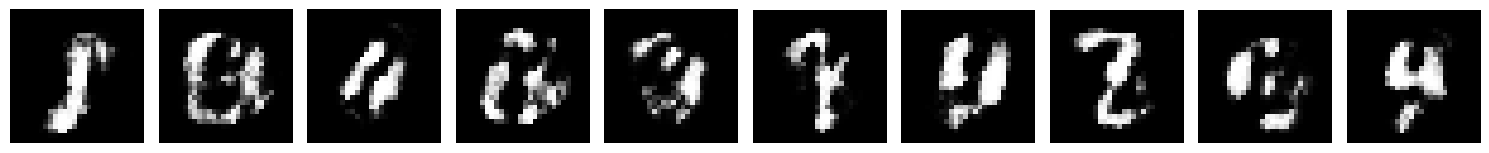

  0%|                                           | 0/1 [04:07<?, ?it/s, 40001/60000, dis_loss: 0.1482, gen_loss: 3.4434]

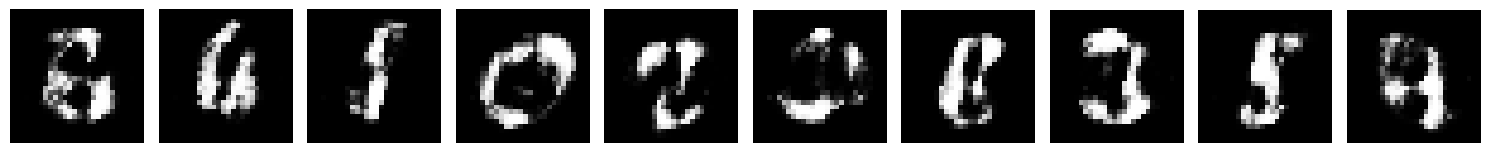

  0%|                                           | 0/1 [04:15<?, ?it/s, 41001/60000, dis_loss: 0.1507, gen_loss: 3.4300]

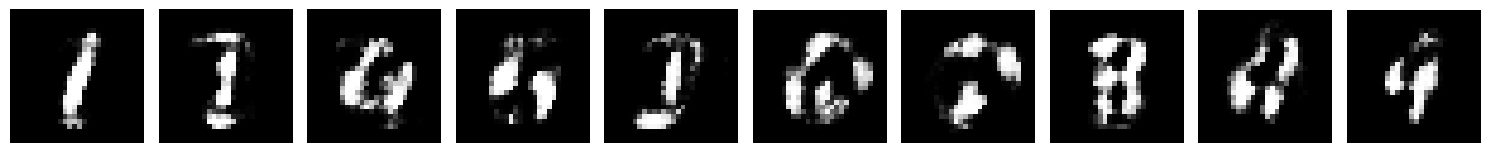

  0%|                                           | 0/1 [04:22<?, ?it/s, 42001/60000, dis_loss: 0.1531, gen_loss: 3.4166]

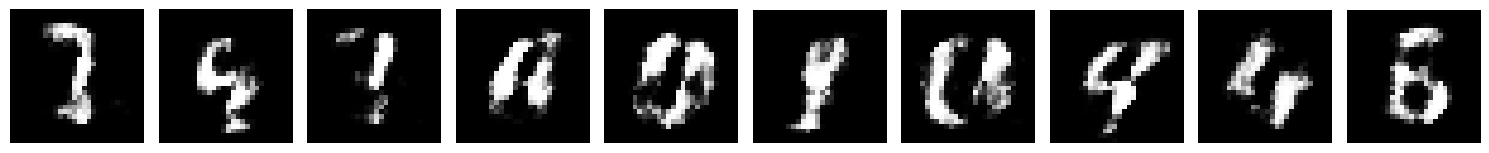

  0%|                                           | 0/1 [04:30<?, ?it/s, 43001/60000, dis_loss: 0.1558, gen_loss: 3.3973]

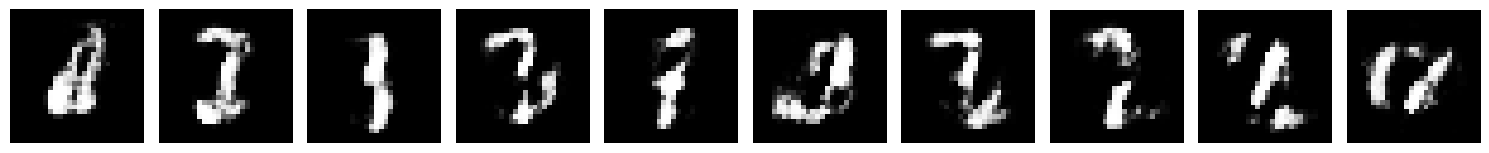

  0%|                                           | 0/1 [04:38<?, ?it/s, 44001/60000, dis_loss: 0.1577, gen_loss: 3.3819]

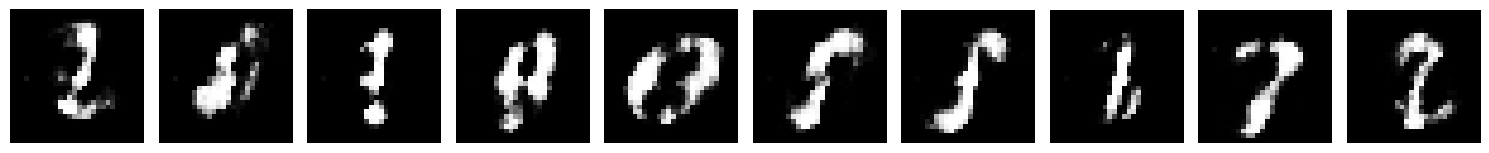

  0%|                                           | 0/1 [04:46<?, ?it/s, 45001/60000, dis_loss: 0.1598, gen_loss: 3.3696]

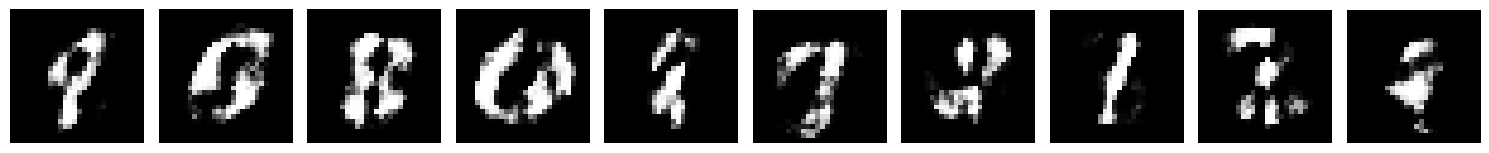

  0%|                                           | 0/1 [04:55<?, ?it/s, 46001/60000, dis_loss: 0.1619, gen_loss: 3.3549]

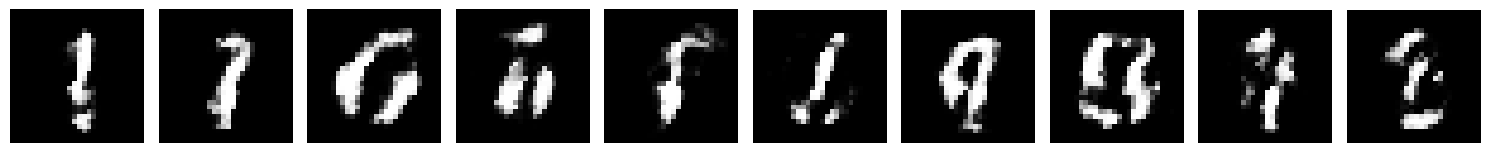

  0%|                                           | 0/1 [05:03<?, ?it/s, 47001/60000, dis_loss: 0.1636, gen_loss: 3.3380]

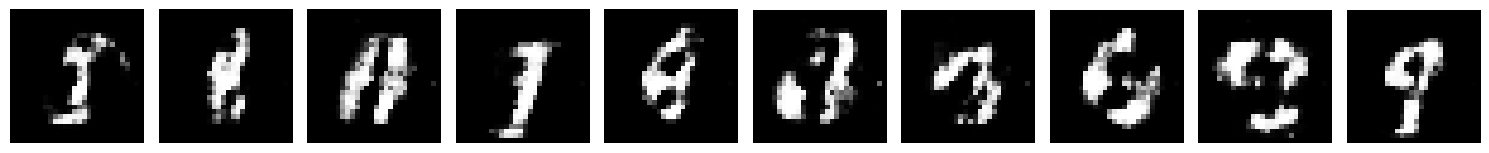

  0%|                                           | 0/1 [05:11<?, ?it/s, 48001/60000, dis_loss: 0.1659, gen_loss: 3.3234]

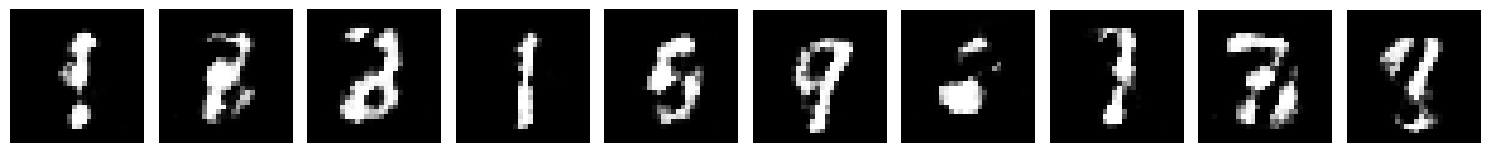

  0%|                                           | 0/1 [05:20<?, ?it/s, 49001/60000, dis_loss: 0.1684, gen_loss: 3.3090]

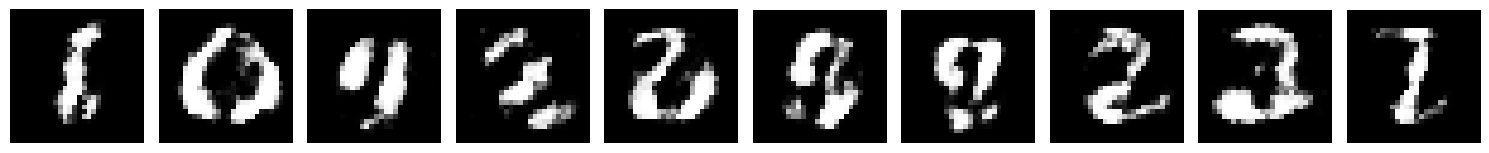

  0%|                                           | 0/1 [05:28<?, ?it/s, 50001/60000, dis_loss: 0.1701, gen_loss: 3.2976]

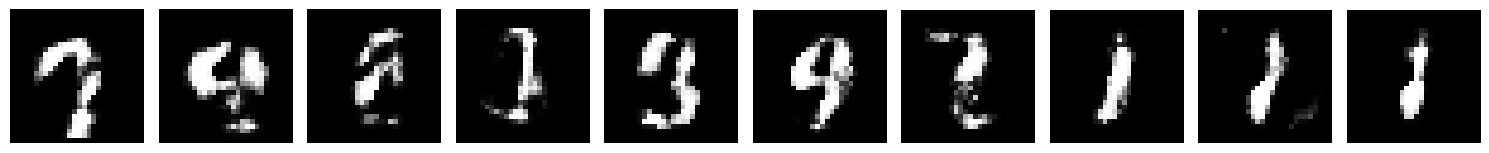

  0%|                                           | 0/1 [05:37<?, ?it/s, 51001/60000, dis_loss: 0.1727, gen_loss: 3.2846]

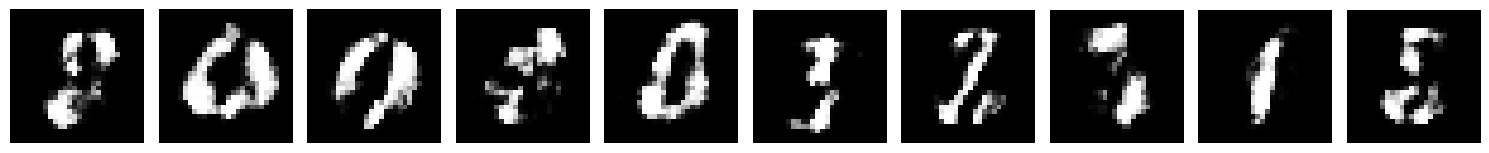

  0%|                                           | 0/1 [05:45<?, ?it/s, 52001/60000, dis_loss: 0.1745, gen_loss: 3.2718]

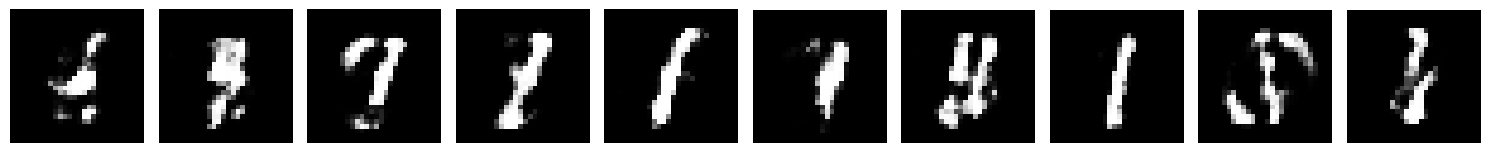

  0%|                                           | 0/1 [05:54<?, ?it/s, 53001/60000, dis_loss: 0.1765, gen_loss: 3.2578]

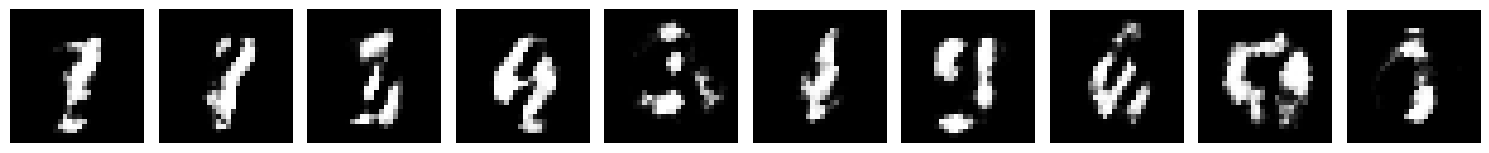

  0%|                                           | 0/1 [06:03<?, ?it/s, 54001/60000, dis_loss: 0.1780, gen_loss: 3.2457]

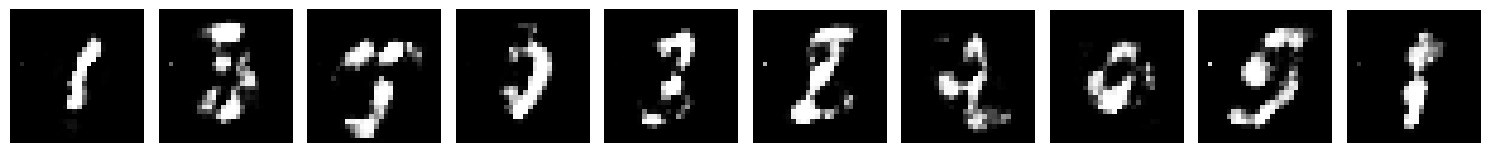

  0%|                                           | 0/1 [06:12<?, ?it/s, 55001/60000, dis_loss: 0.1798, gen_loss: 3.2348]

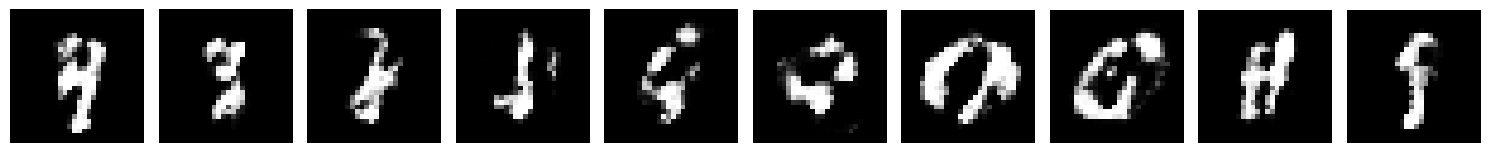

  0%|                                           | 0/1 [06:21<?, ?it/s, 56001/60000, dis_loss: 0.1817, gen_loss: 3.2226]

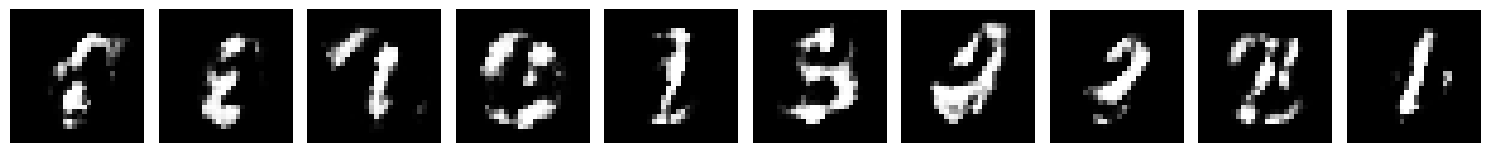

  0%|                                           | 0/1 [06:30<?, ?it/s, 57001/60000, dis_loss: 0.1833, gen_loss: 3.2137]

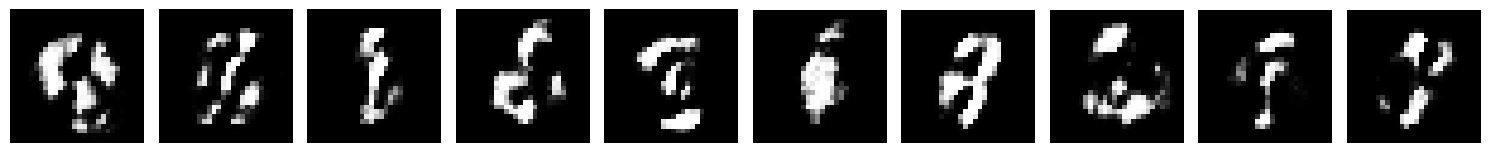

  0%|                                           | 0/1 [06:39<?, ?it/s, 58001/60000, dis_loss: 0.1845, gen_loss: 3.2046]

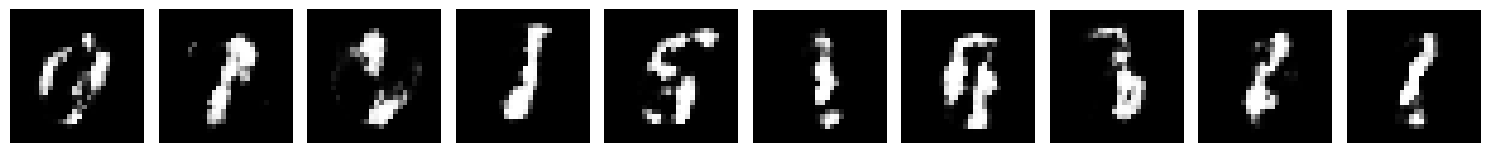

  0%|                                           | 0/1 [06:48<?, ?it/s, 59001/60000, dis_loss: 0.1857, gen_loss: 3.1969]

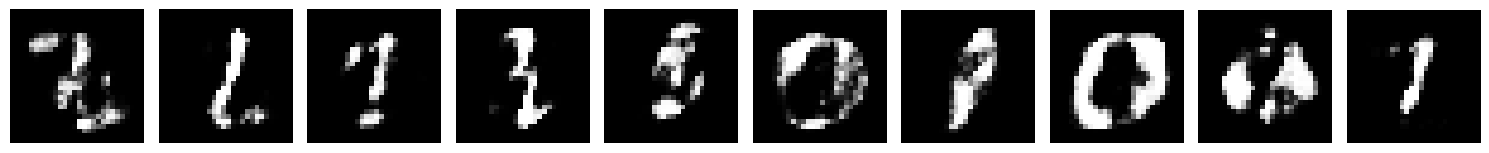

100%|██████████████████████████████████| 1/1 [06:57<00:00, 417.61s/it, 60000/60000, dis_loss: 0.1862, gen_loss: 3.1931]


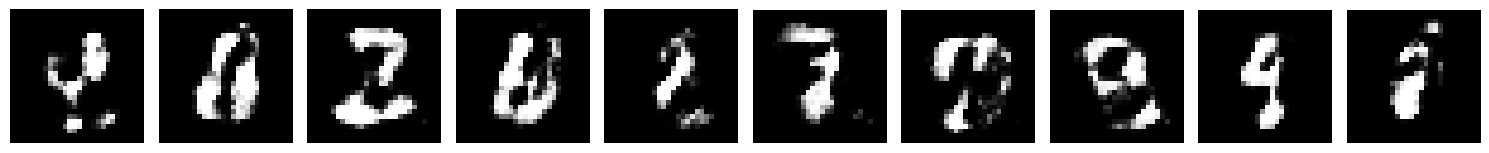

In [6]:
progress = tqdm(range(1))
for epoch in progress:
    dis_losses = []
    gen_losses = []
    
    for step, (x, target) in enumerate(train_dataset):
        x = x.reshape(-1).to(device)
        target = torch.Tensor([1.]).to(device)
        pos_loss = train_step(discriminator, x, target, criterion, disc_optimizer)

        seed = torch.randn(100).to(device)
        x = generator(seed).detach()
        target = torch.Tensor([0.]).to(device)
        neg_loss = train_step(discriminator, x, target, criterion, disc_optimizer)

        seed = torch.randn(100).to(device)
        x = generator(seed)
        target = torch.Tensor([1.]).to(device)
        gen_loss = train_step(discriminator, x, target, criterion, genr_optimizer)

        dis_losses.append(pos_loss)
        dis_losses.append(neg_loss)
        gen_losses.append(gen_loss)

        progress.set_postfix_str(f"{step + 1}/{len(train_dataset)}, dis_loss: {np.mean(dis_losses):.04f}, gen_loss: {np.mean(gen_losses):.04f}")
        if step % 1000 == 0:
            show_plt(generator, 10)

generator.eval()
show_plt(generator, 10)

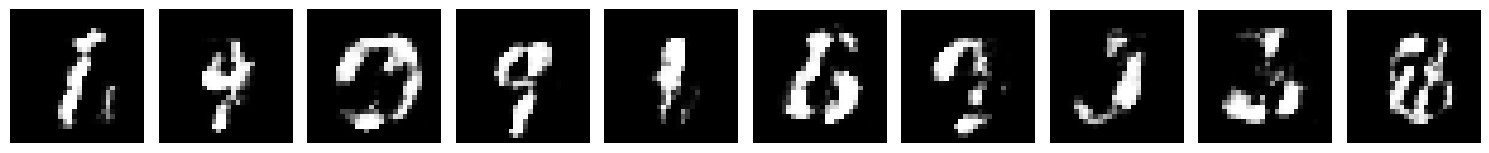

In [7]:
generator.eval()
show_plt(generator, 10)